In [1]:
#%watermark -v -p pandas,matplotlib,seaborn,

!pip install google_play_scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [3]:
app_packages = [
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner',
  'ng.mtn.nextgen',
  'net.one97.selfcare.globacom',
  'com.airtel.africa.selfcare' 
]

In [4]:
app_infos = []
for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 17/17 [00:03<00:00,  4.99it/s]


In [6]:
def print_json(json_object):
  json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [7]:
print_json(app_infos[0])

{
  "adSupported": false,
  "appId": "com.todoist",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Trusted by 30+ million people and teams worldwide. Todoist is a delightfully simple yet powerful task planner and to-do list app. Finally, organize your work and life. \r\n\r\n\ud83c\udfc5 TechRadar - \u201c...one of the best apps you can use to plan your personal and work schedules. The app has a lot of task management features, and its user interface is nothing short of stellar.\u201d\r\n\r\n\ud83c\udfc6 Best App for Wear OS 2022 by Google Play\r\n\r\n\ud83c\udfc6 2020 Editor's Choice by Google\r\n\r\nUse Todoist to:\r\n\u2022 Reach that mental clarity you\u2019ve been longing for by using Quick Add to capture and schedule to-do list tasks the moment they pop into your head. \r\n\u2022 Add tasks to your to-do list like \u201cRead work emails every day at 10am\u201d using Todoist\u2019s powerful everyday l

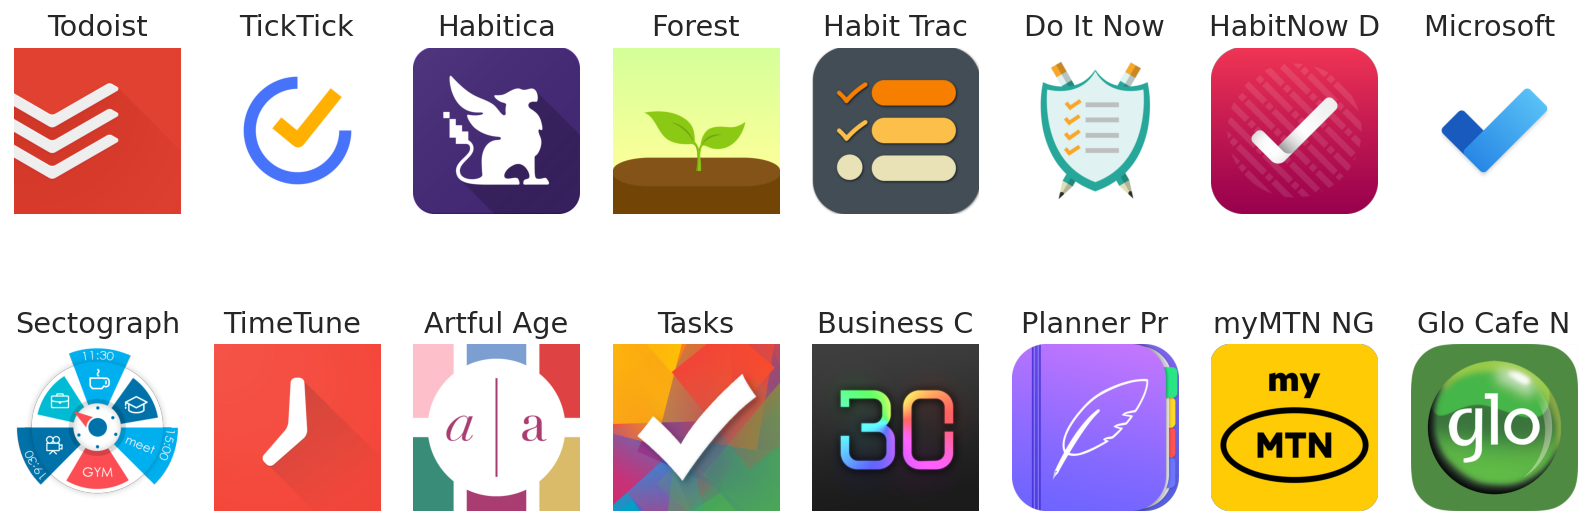

In [8]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]
fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))
for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [9]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [11]:
cc = pd.read_csv('/content/apps.csv')
cc.head(5)

,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,appId,url
0,Todoist: to-do list & planner,Trusted by 30+ million people and teams worldw...,Trusted by 30+ million people and teams worldw...,Simple yet powerful to-do list. Habit planner ...,"10,000,000+",10000000,36376677,4.474541,250792,15714,...,NaN,Everyone,NaN,False,False,"Nov 18, 2012",1676289232,Varies with device,com.todoist,https://play.google.com/store/apps/details?id=...
1,TickTick:To-do list & Tasks,🥇<b>Great to-do list app for new Android devic...,🥇<b>Great to-do list app for new Android devic...,"Time Management & Planner Reminder, Calendar,...","5,000,000+",5000000,5961781,4.649653,110983,6250,...,NaN,Everyone,NaN,False,False,"Jun 19, 2013",1675832376,Varies with device,com.ticktick.task,https://play.google.com/store/apps/details?id=...
2,Habitica: Gamify Your Tasks,Habitica is a free habit-building and producti...,Habitica is a free habit-building and producti...,Treat your life like a game to stay motivated ...,"1,000,000+",1000000,3853826,4.122905,23662,2596,...,NaN,Everyone,NaN,True,True,"Dec 10, 2015",1675440245,4.1.5,com.habitrpg.android.habitica,https://play.google.com/store/apps/details?id=...
3,Forest: Focus for Productivity,Can't stop scrolling? Lack of self-control? Fo...,Can&#39;t stop scrolling? Lack of self-control...,Stay focused on your goal or to dos and get mo...,"10,000,000+",10000000,30228171,4.743546,562550,8331,...,NaN,Everyone,NaN,True,True,"Aug 25, 2014",1676017026,Varies with device,cc.forestapp,https://play.google.com/store/apps/details?id=...
4,Habit Tracker,» Organize Your Life!\r\nHabitBull is the most...,» Organize Your Life!<br>HabitBull is the most...,"Organize Your life, Track Daily Goals, Build P...","1,000,000+",1000000,3537325,4.402145,80407,6332,...,https://play-lh.googleusercontent.com/QEGXjKhI...,Everyone,NaN,False,False,"Mar 5, 2014",1665554769,1.5.15,com.oristats.habitbull,https://play.google.com/store/apps/details?id=...


In [12]:
app_reviews = []
for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 17/17 [00:54<00:00,  3.18s/it]


In [13]:
print_json(app_reviews[0])

{
  "appId": "com.todoist",
  "at": "2022-08-30 00:26:15",
  "content": "I really wanted to like this app but there is no way to order items on todo lists. I have at this point had to reorder all of my items over 10 times for each because when u use the drag and drop menu to change the order it doesn't save it permanently there is also no way to sort your todo lists by date because I figured if I input a deadline for each item it would show me what I had to do with the one due the soonest at the top but no. I wish there were more ways to sort or at least filter date",
  "repliedAt": "2022-09-01 04:58:15",
  "replyContent": "Hi June! We are sorry to hear about the drag-and-drop issue. We would like to have a deeper look and see if there's a way to make it stick. Please submit a ticket here https://todoist.com/contact so we can get in touch. As for sorting, please try this: https://todoist.com/help/articles/how-to-sort-your-tasks. Thank you \ud83d\ude4f",
  "reviewCreatedVersion": "v1031

In [14]:
len(app_reviews)

19846

In [15]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

In [18]:
rv = pd.read_csv('/content/reviews.csv')
rv.tail(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
19841,272da962-afa9-45b9-85e6-30614ad9680f,Merity Matambo,https://play-lh.googleusercontent.com/a/AEdFTp...,Awesome,5,0,1.3.26,2023-02-12 10:32:07,"Hello Merity, We’re pleased that you enjoyed o...",2023-02-12 11:11:50,newest,com.airtel.africa.selfcare
19842,8f5de274-edbf-472b-9d9d-35c2d5bf9d94,istore Electronics Concept,https://play-lh.googleusercontent.com/a-/AD5-W...,Cool,5,0,NaN,2023-02-12 10:06:11,"Hello Istore, We’re pleased that you enjoyed o...",2023-02-12 11:12:41,newest,com.airtel.africa.selfcare
19843,9dedba39-838f-4cda-829d-bfe89e52b1d5,Exavery Joackim,https://play-lh.googleusercontent.com/a/AEdFTp...,Omg,5,0,1.3.26,2023-02-12 09:57:24,"Hello Exavery, Thanks for the 5 star rating. H...",2023-02-12 11:13:12,newest,com.airtel.africa.selfcare
19844,9c1a2c39-b47e-4f87-bc84-63759911c2ef,Akin A,https://play-lh.googleusercontent.com/a/AEdFTp...,Nice Experience,5,0,1.3.20,2023-02-12 09:52:49,"Hello Akin, We’re pleased that you enjoyed our...",2023-02-12 11:13:38,newest,com.airtel.africa.selfcare
19845,33a81d2f-2700-46e4-a2c0-48a2a6ef5186,Nsubuga wavez,https://play-lh.googleusercontent.com/a-/AD5-W...,good,5,0,1.3.26,2023-02-12 08:50:43,"Hello Nsubuga, Thank you so much for your enco...",2023-02-12 08:56:16,newest,com.airtel.africa.selfcare


In [19]:
from google_play_scraper import app

result = app(
    'com.nianticlabs.pokemongo',
    lang='en', # defaults to 'en'
    country='us' # defaults to 'us'
)

In [20]:
result

{'title': 'Pokémon GO',
 'description': 'New! Now you can battle other Pokémon GO Trainers online! Try the GO Battle League today!\r\n\r\nJoin Trainers across the globe who are discovering Pokémon as they explore the world around them. Pokémon GO is the global gaming sensation that has been downloaded over 1 billion times and named “Best Mobile Game” by the Game Developers Choice Awards and “Best App of the Year” by TechCrunch.\r\n_______________\r\n\r\nUncover the world of Pokémon: Explore and discover Pokémon wherever you are!\r\n \r\nCatch more Pokémon to complete your Pokédex!\r\n \r\nJourney alongside your Buddy Pokémon to help make your Pokémon stronger and earn rewards!\r\n\r\nCompete in epic Gym battles and...Team up with other Trainers to catch powerful Pokémon during Raid Battles!\r\n \r\nIt’s time to get moving—your real-life adventures await! Let’s GO!\r\n_______________\r\n\r\nNotes: \r\n- This app is free-to-play and offers in-game purchases. It is optimized for smartphon

In [33]:
review = result['comments']
review

["The last update has been glitching way too much. When raiding it keeps freezing. and for the last 2 weeks, I've had issues with my buddy whenever attempting to do the buddy adventure: the screen will either go all black or all white and my buddy never joins when trying to play during the day, in rare occasions, it does join but only at night (anyone else having those issue?). I've already submitted a teouble ticket with no resolution.",
 "Great... When it doesn't crash. been playing since the beginning and traveled around the world playing this game. Great casual game that gives me an excuse to get some fresh air... Problem is it has been crashing a lot. Pixel6Pro, reinstalled the game, no help. It's especially frustrating during the Battle League because there's no way to save your win streak if you have to reboot the app and wait 30 sec to run through the menu and attempt to reconnect. Would be an easy 4.5/5 stars otherwise :(",
 'Usually a fun game. Always crashes when I\'m in the

In [40]:
# Turn the list into a literal string:
s = ['I', 'want', 4, 'apples', 'and', 18, 'bananas'] 

with open('myfile.txt', 'w') as f:
    for item in review:
        f.write("%s\n" % item)

f=open("myfile.txt",'r')
new = f.read()

In [24]:
#$ sudo apt install python3-nltk##
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import nltk
# Download tokenizer 'punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
# OUr sample text
para = '''Either the well was very deep, or she fell very slowly, for she had
plenty of time as she went down to look about her and to wonder what was going
to happen next. First, she tried to look down and make out what she was coming to,
but it was too dark to see anything; then she looked at the sides of the well, and
noticed that they were filled with cupboards and book-shelves; here and there she
saw maps and pictures hung upon pegs. She took down a jar from one of the shelves
as she passed; it was labelled 'ORANGE MARMALADE', but to her great disappointment it
was empty: she did not like to drop the jar for fear of killing somebody, so managed
to put it into one of the cupboards as she fell past it.'''

tokens = nltk.sent_tokenize(new)
for t in tokens:
    print(t, "\n")

The last update has been glitching way too much. 

When raiding it keeps freezing. 

and for the last 2 weeks, I've had issues with my buddy whenever attempting to do the buddy adventure: the screen will either go all black or all white and my buddy never joins when trying to play during the day, in rare occasions, it does join but only at night (anyone else having those issue?). 

I've already submitted a teouble ticket with no resolution. 

Great... 

When it doesn't crash. 

been playing since the beginning and traveled around the world playing this game. 

Great casual game that gives me an excuse to get some fresh air... 

Problem is it has been crashing a lot. 

Pixel6Pro, reinstalled the game, no help. 

It's especially frustrating during the Battle League because there's no way to save your win streak if you have to reboot the app and wait 30 sec to run through the menu and attempt to reconnect. 

Would be an easy 4.5/5 stars otherwise :(
Usually a fun game. 

Always crashes wh

In [27]:
# To tweak the punk tokenizer to suit  your text case you could do

from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters

para = '''Either the well was very deep, or she fell very slowly, for she had plenty
of time as she went down to look about her and to wonder what was going to happen
next. First, she tried to look down and make out what she was coming to, but it was
too dark to see anything; then she looked at the sides of the well, and noticed
that they were filled with cupboards and book-shelves; here and there she saw maps
and pictures hung upon pegs. She took down a jar from one of the shelves as she
passed; it was labelled 'ORANGE MARMALADE', but to her great disappointment it was
empty: she did not like to drop the jar for fear of killing somebody, so managed to
put it into one of the cupboards as she fell past it.'''

punkt_params = PunktParameters()
punkt_params.abbrev_types = set(['Mr', 'Mrs', 'LLC'])
tokenizer = PunktSentenceTokenizer(punkt_params)
tokens = tokenizer.tokenize(para)

for t in tokens:
    print (t, "\n")

Either the well was very deep, or she fell very slowly, for she had plenty
of time as she went down to look about her and to wonder what was going to happen
next. 

First, she tried to look down and make out what she was coming to, but it was
too dark to see anything; then she looked at the sides of the well, and noticed
that they were filled with cupboards and book-shelves; here and there she saw maps
and pictures hung upon pegs. 

She took down a jar from one of the shelves as she
passed; it was labelled 'ORANGE MARMALADE', but to her great disappointment it was
empty: she did not like to drop the jar for fear of killing somebody, so managed to
put it into one of the cupboards as she fell past it. 

